In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('DatasetSkripsiFix.csv', delimiter=';')
df

,NAMA_TIPE,PENJUALAN_2020,PENJUALAN_2021,PENJUALAN_2022
0,VARIO 125 CBS,183,238,129
1,GENIO CBS,206,120,147
2,ADV 150 CBS,57,80,17
3,VARIO 125 CBS ISS,181,198,151
4,NEW PCX 150 ABS,93,4,0
5,BEAT SPORTY CBS ISS,273,333,198
6,BEAT SPORTY CBS,532,989,620
7,VARIO 150,234,310,20
8,REVO FIT,23,29,35
9,GENIO CBS ISS,59,126,190


In [7]:
df.isnull().sum()

NAMA_TIPE         0
PENJUALAN_2020    0
PENJUALAN_2021    0
PENJUALAN_2022    0
dtype: int64

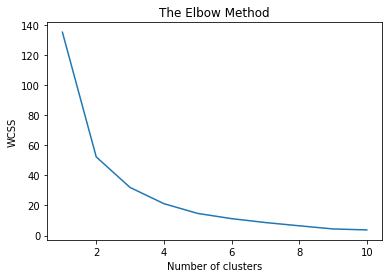

In [8]:
df_cluster_feature = df[['PENJUALAN_2020', 'PENJUALAN_2021', 'PENJUALAN_2022']]
sc = StandardScaler()
df_elbow = sc.fit_transform(df_cluster_feature.astype(float))

wcss = []

for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(df_elbow)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(2)
kmeans.fit(df_elbow)
score = silhouette_score(df_elbow, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.738


In [9]:
kmeans = KMeans(3)
kmeans.fit(df_elbow)
score = silhouette_score(df_elbow, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.615


In [11]:
kmeans = KMeans(4)
kmeans.fit(df_elbow)
score = silhouette_score(df_elbow, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.601


In [12]:
kmeans = KMeans(5)
kmeans.fit(df_elbow)
score = silhouette_score(df_elbow, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.585
